# Whole cell patch-clamp recordings of cerebellar Golgi cells 

In this notebook we will look more closely at the EBRAINS dataset "[Whole cell patch-clamp recordings of cerebellar Golgi cells (v1)](https://search.kg.ebrains.eu/instances/17196b79-04db-4ea4-bb69-d20aab6f1d62)", contributed by Egidio D’Angelo from department of Brain and Behavioral Sciences, University of Pavia, Pavia, Italy.

As we can see from the dataset description,

<i>In this dataset we investegated the Golgi cells properties and their excitatory synapses, whole-cell patch-clamp recordings were performed on acute parasagittal cerebellar slices obtained from juvenile GlyT2-GFP mice (p16-p21).</i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/17196b79-04db-4ea4-bb69-d20aab6f1d62).

This dataset forms part of the results reported in Masoli S, Ottaviani A, Casali S, D’Angelo E (2020) Cerebellar Golgi cell models predict dendritic processing and mechanisms of synaptic plasticity. *PLOS Computational Biology* **16**(12)https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007937

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

problem: no information about voltage because only one channel available, 
    no information about which cells are which so impossible to reproduce graphs considering that this is how they are separated

In [1]:
#preparing the notebook
import neo
import matplotlib.pyplot as plt
from neo import get_io
from neo import io
import numpy as np
from statistics import mean
import statistics
import glob
!pip install efel
import efel

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


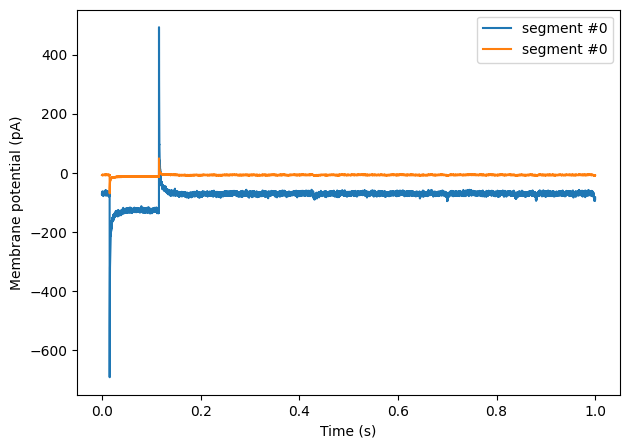

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


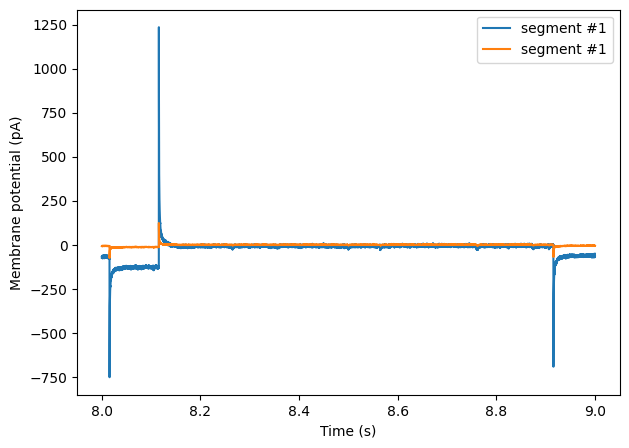

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


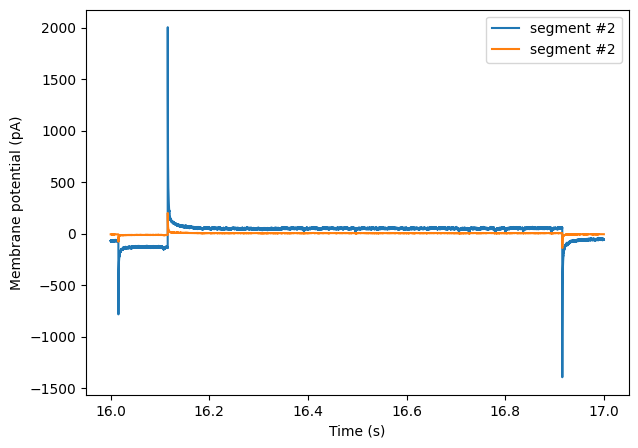

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


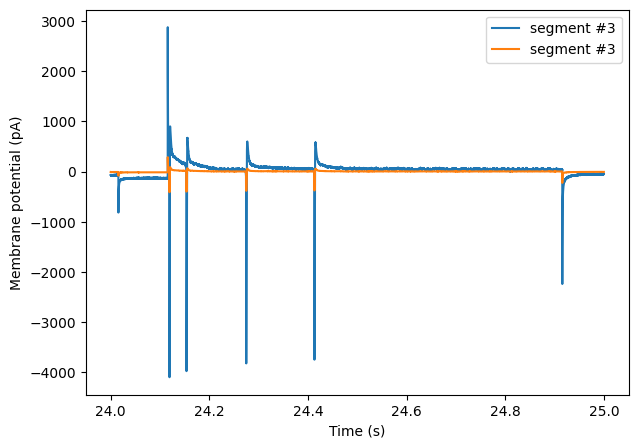

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


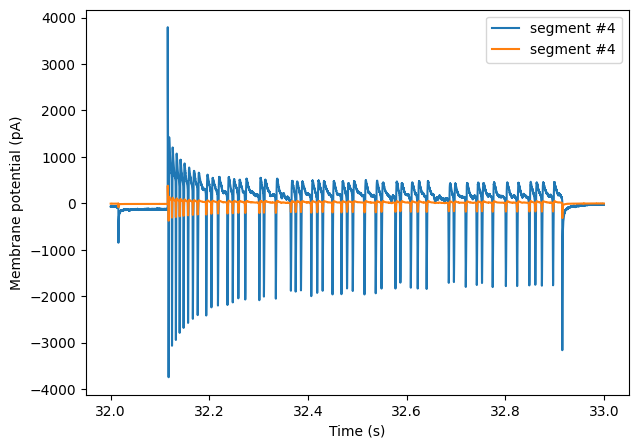

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


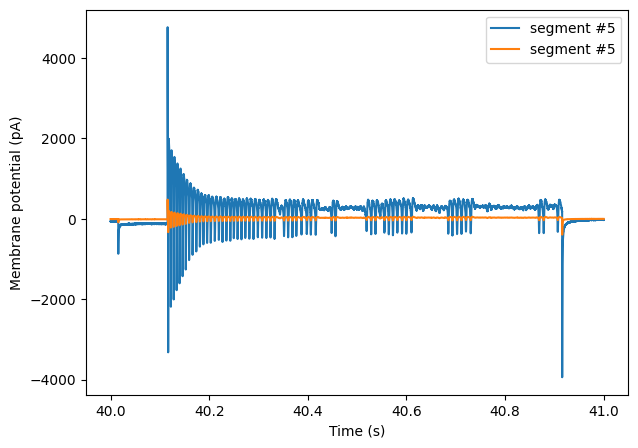

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


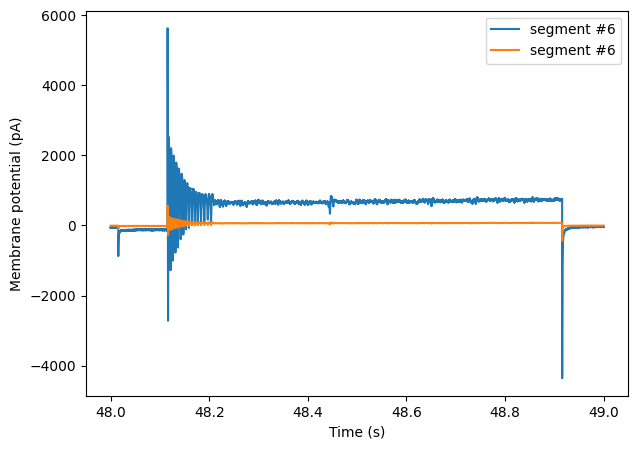

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


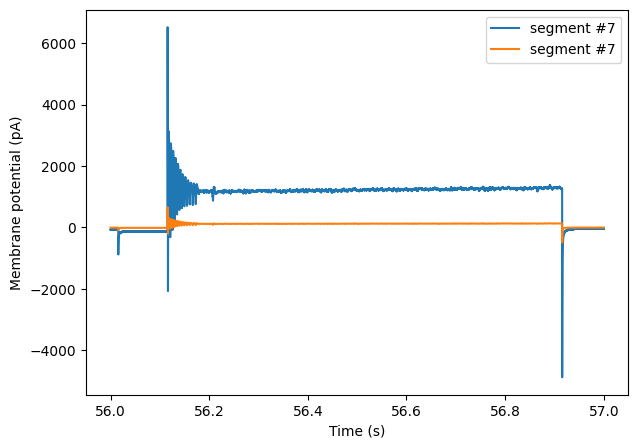

In [2]:
#visualisation of the data, 
n=0
while n<8:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000018_PatchClamp-GolgiCells_pub/GoC_Subject01_080419/80419_0007_IV.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend()
    plt.title("")
    plt.show()
    n=n+1

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


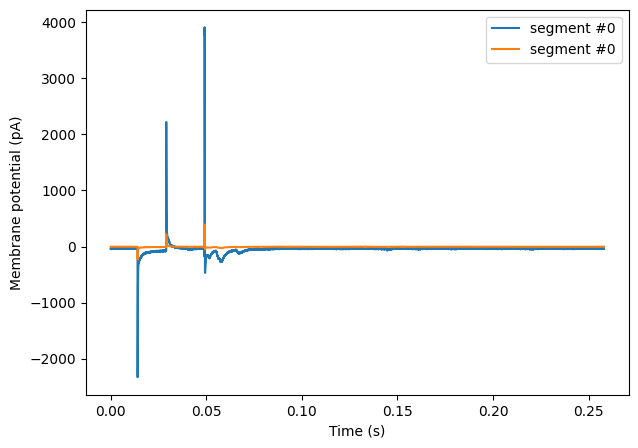

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


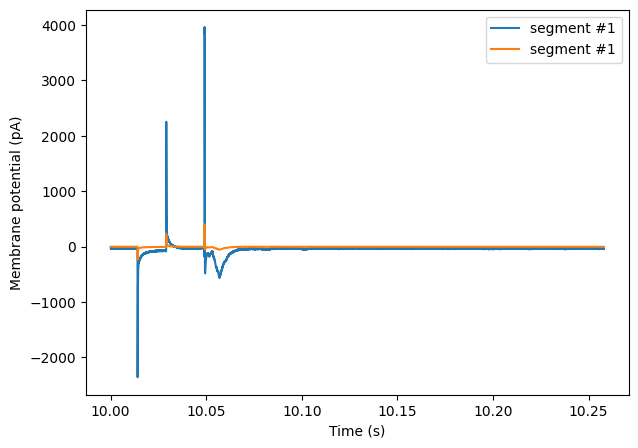

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


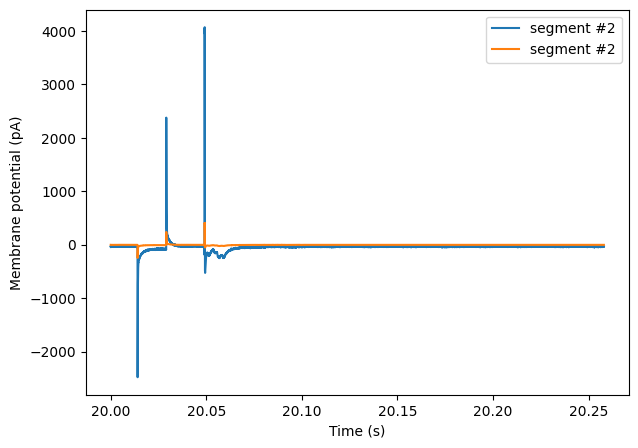

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


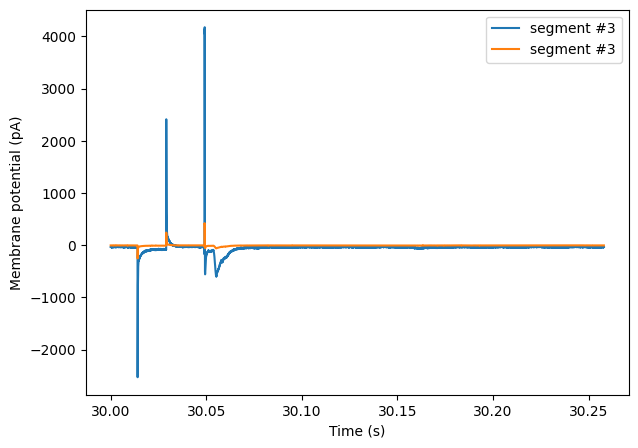

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


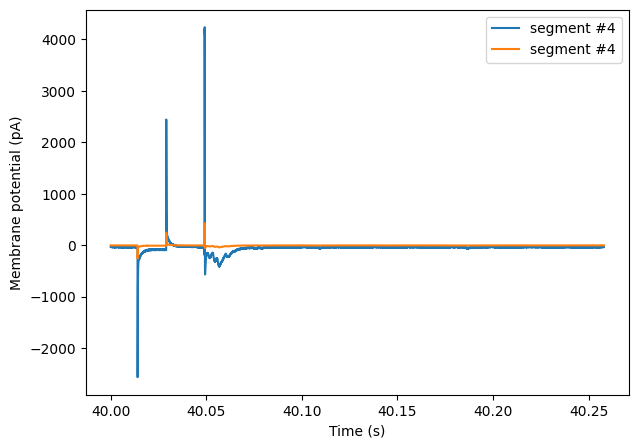

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


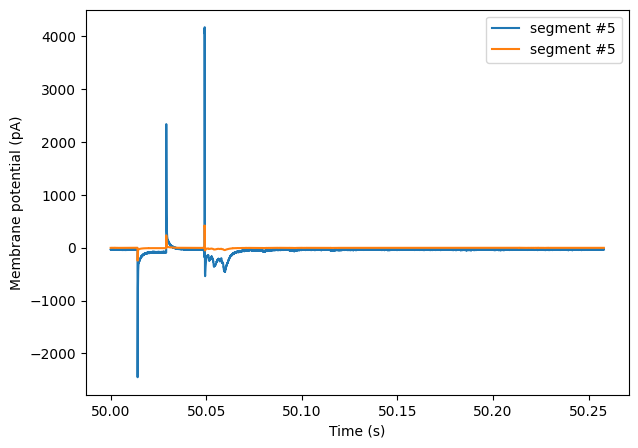

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


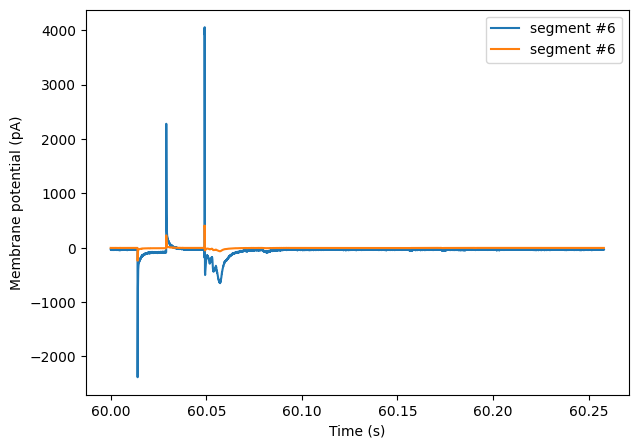

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


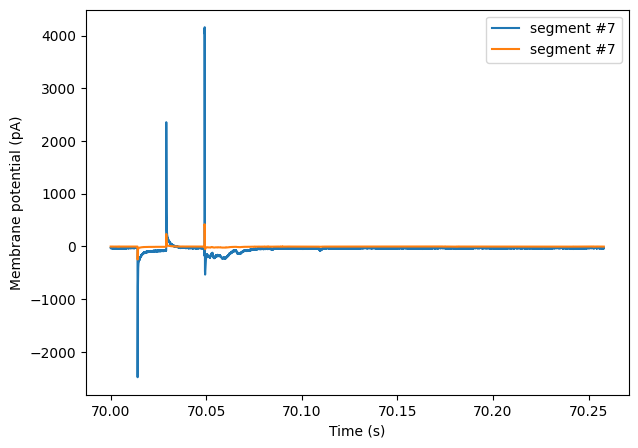

In [3]:
#visualisation of the data, 
n=0
while n<8:
    plt.rcParams["figure.figsize"] = (7, 5)
    file_path = ("hbp-d000018_PatchClamp-GolgiCells_pub/GoC_Subject02_100419/100419_0025_EPSC.abf")
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    reader = get_io(file_path)
    data = reader.read(lazy=True)
    seg0 = data[0].segments[(n)]
    channel0 = seg0.analogsignals[0]
    channel0 = channel0.load()
    channel0.array_annotations = {}
    plt.plot(channel0.times, channel0, label=f"segment #{n}")
    plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
    plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
    plt.legend()
    plt.title("")
    plt.show()
    n=n+1

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


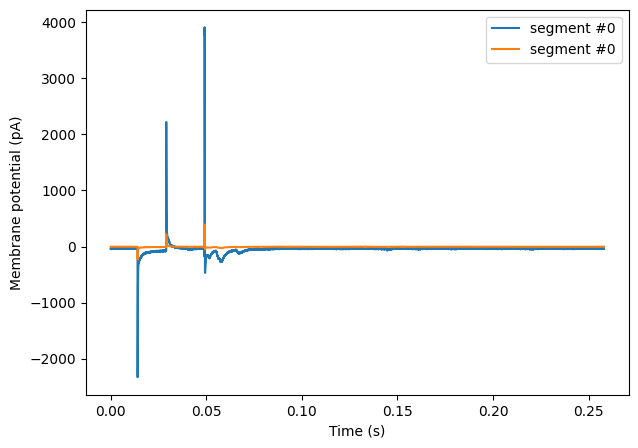

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


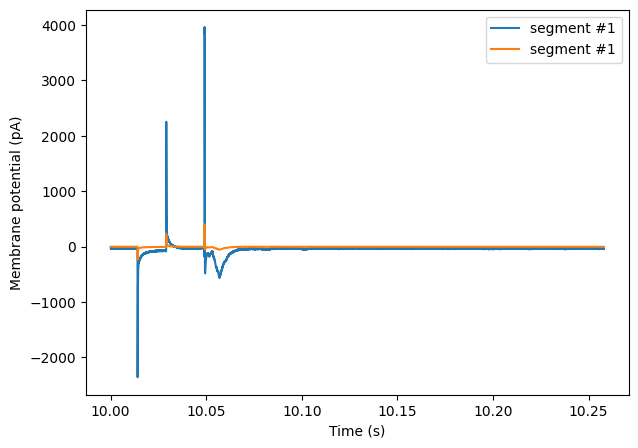

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


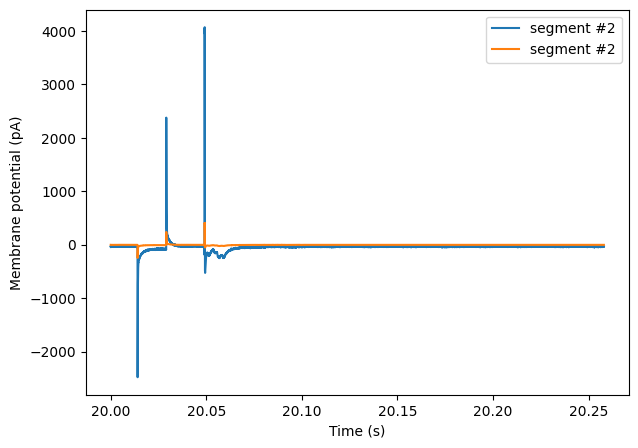

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


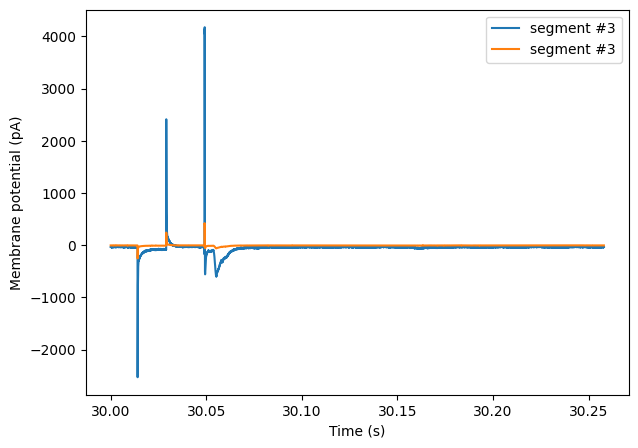

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


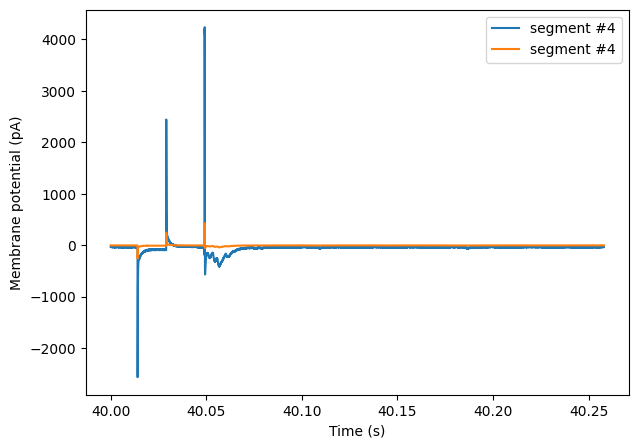

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


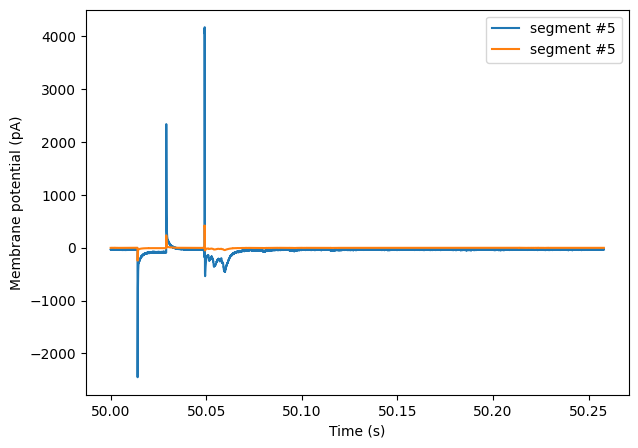

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


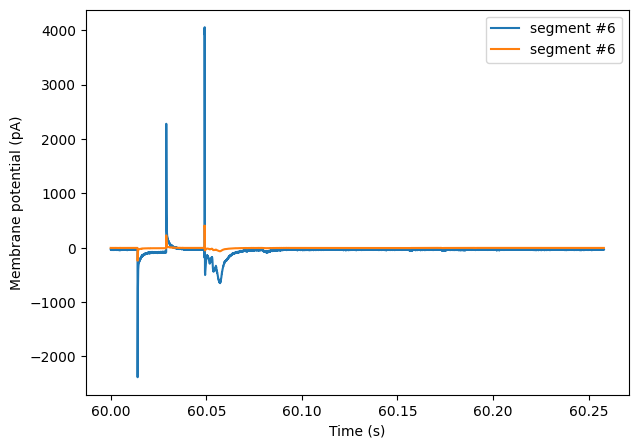

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


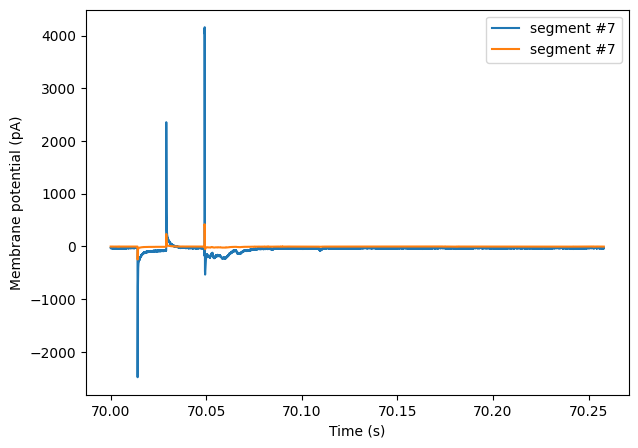

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


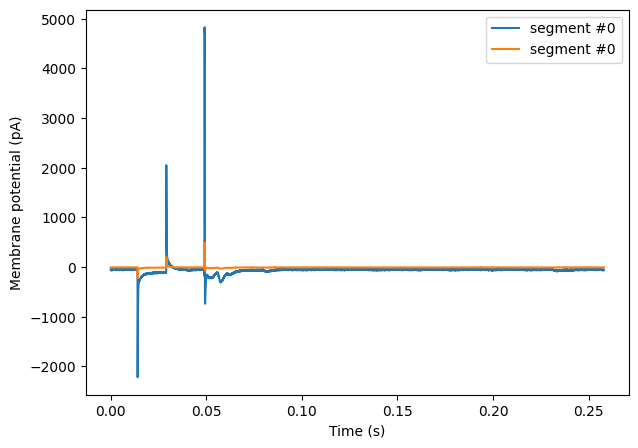

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


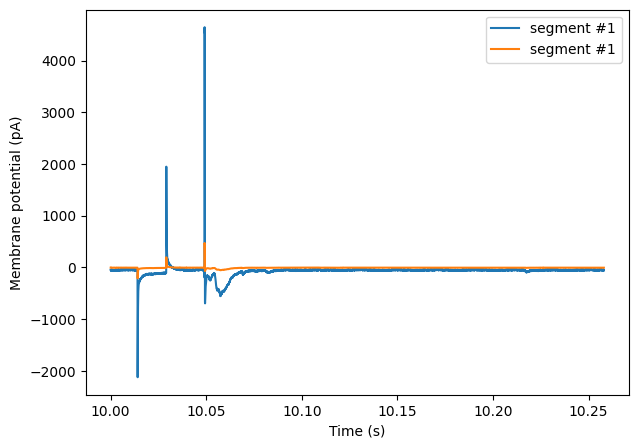

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


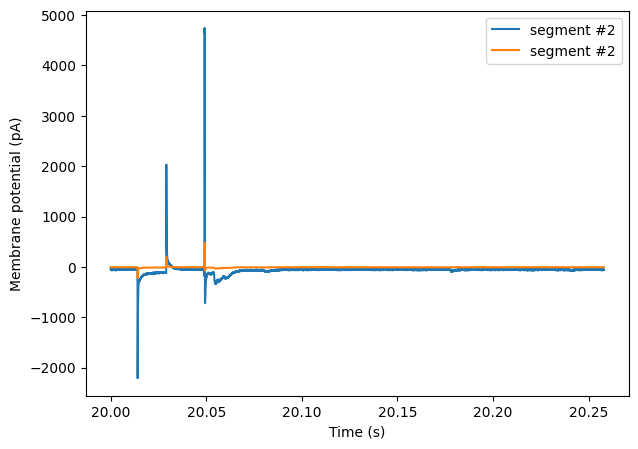

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


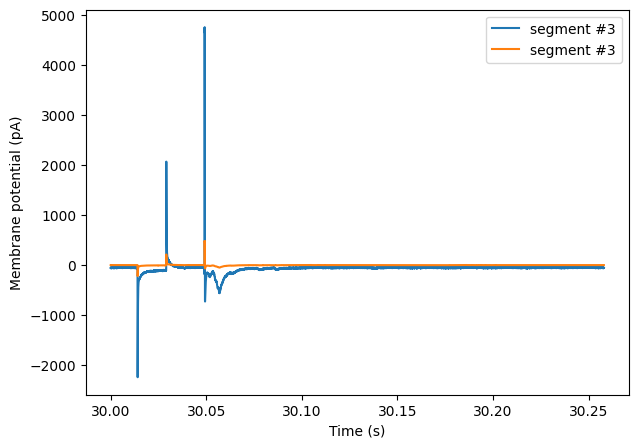

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


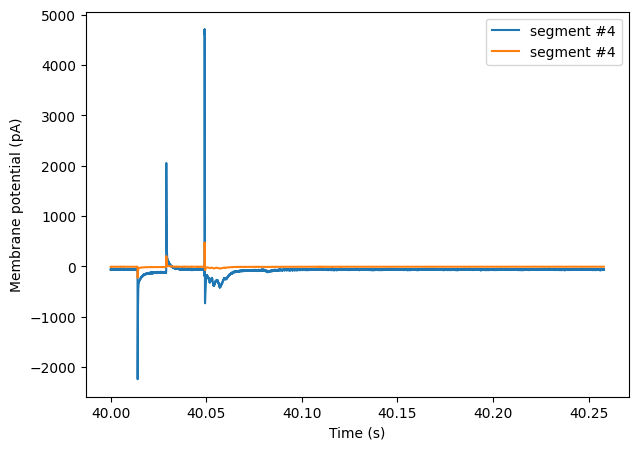

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


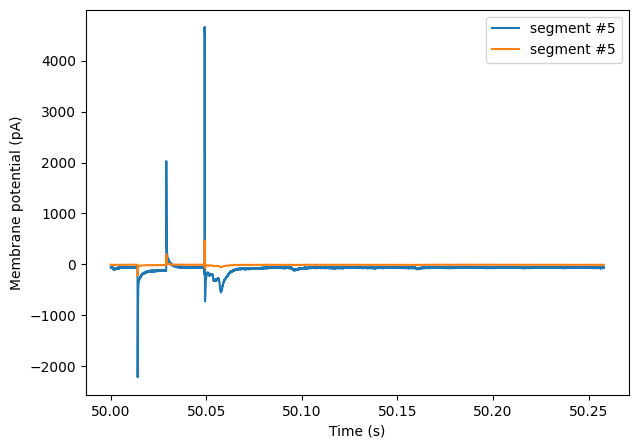

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


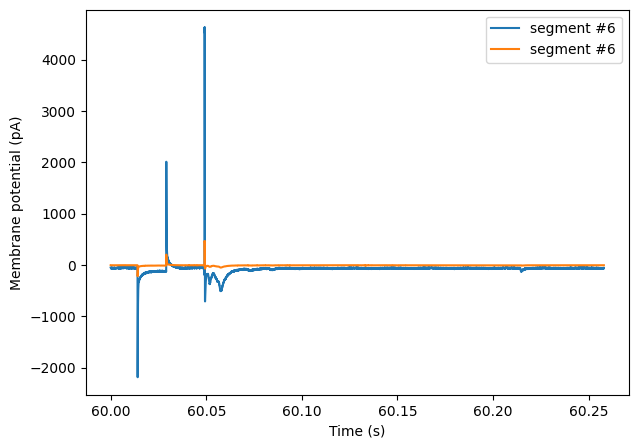

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


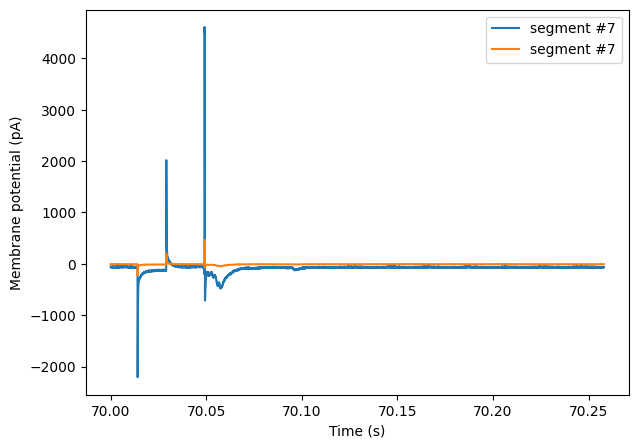

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


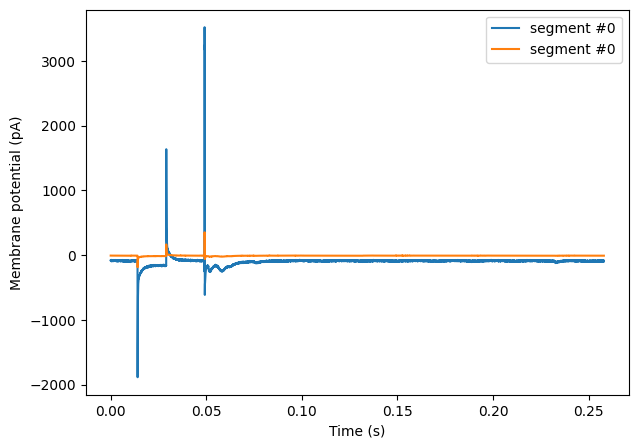

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


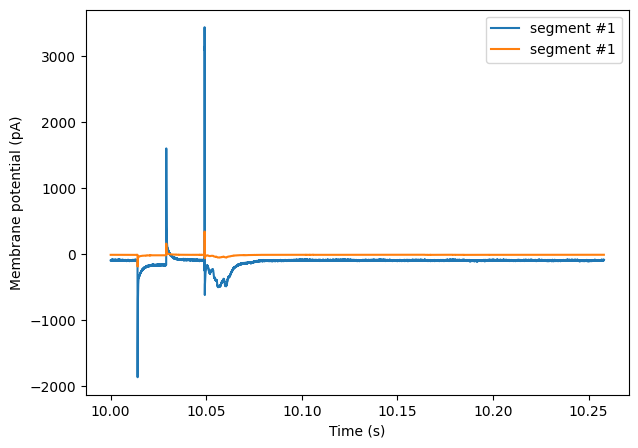

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


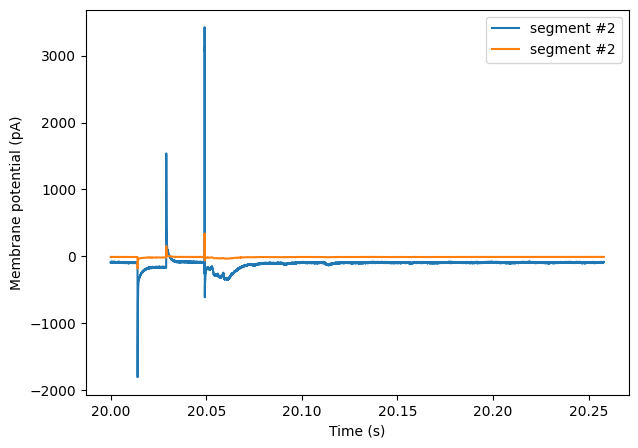

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


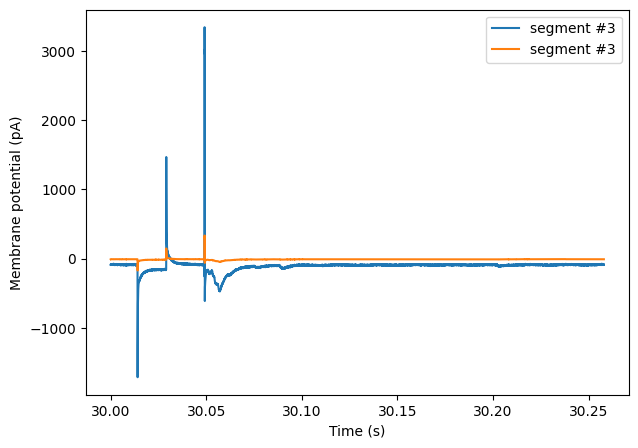

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


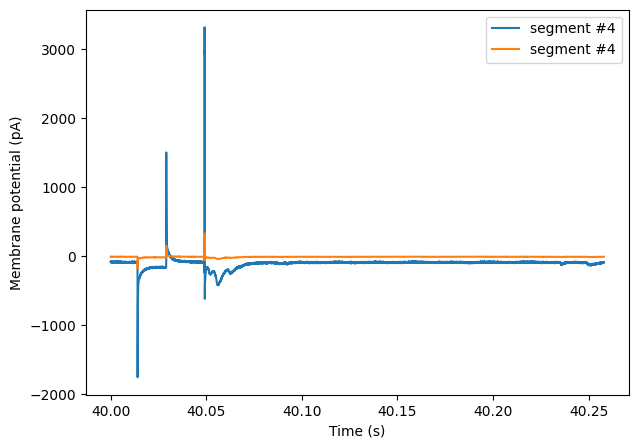

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


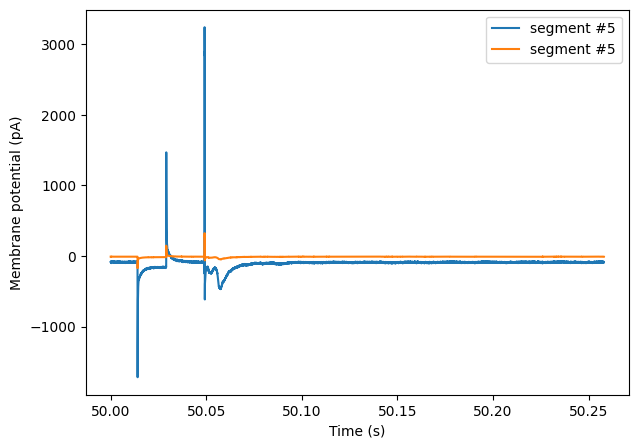

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


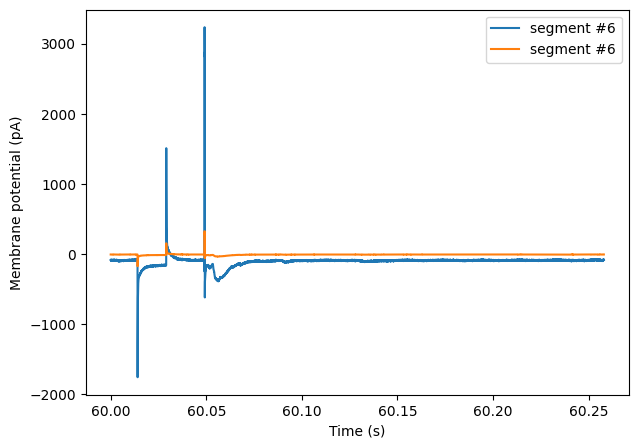

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


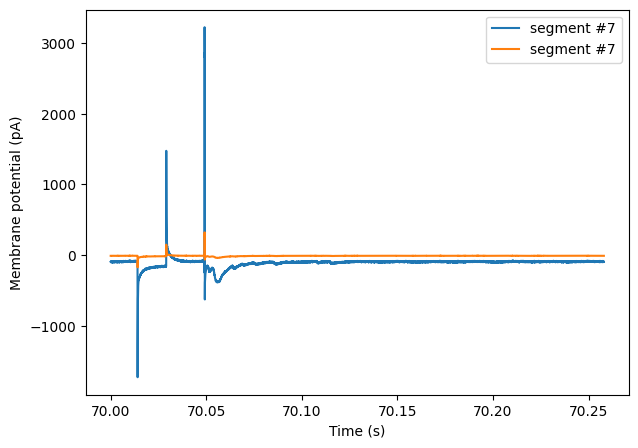

In [4]:


for file_path in glob.glob("hbp-d000018_PatchClamp-GolgiCells_pub/GoC_Subject02_100419/*.abf"):
   
    n=0
    while n<8:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[0]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend()
        plt.title("")
        plt.show()
        n=n+1

In [5]:


for file_path in glob.glob("hbp-d000018_PatchClamp-GolgiCells_pub/GoC_Subject02_100419/*.abf"):
   
    n=0
    while n<8:
        plt.rcParams["figure.figsize"] = (7, 5)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        reader = get_io(file_path)
        data = reader.read(lazy=True)
        seg0 = data[0].segments[(n)]
        channel0 = seg0.analogsignals[1]
        channel0 = channel0.load()
        channel0.array_annotations = {}
        plt.plot(channel0.times, channel0, label=f"segment #{n}")
        plt.xlabel(f"Time ({channel0.times.units.dimensionality.string})")
        plt.ylabel(f"Membrane potential ({channel0.units.dimensionality.string})")
        plt.legend()
        plt.title("")
        plt.show()
        n=n+1

/home/isaurebotherel/.local/lib/python3.8/site-packages/neo/io/basefromrawio.py:107: UserWarning: default "signal_group_mode" have change in version 0.9:now all channels are group together in AnalogSignal
  warnings.warn('default "signal_group_mode" have change in version 0.9:'


IndexError: list index out of range